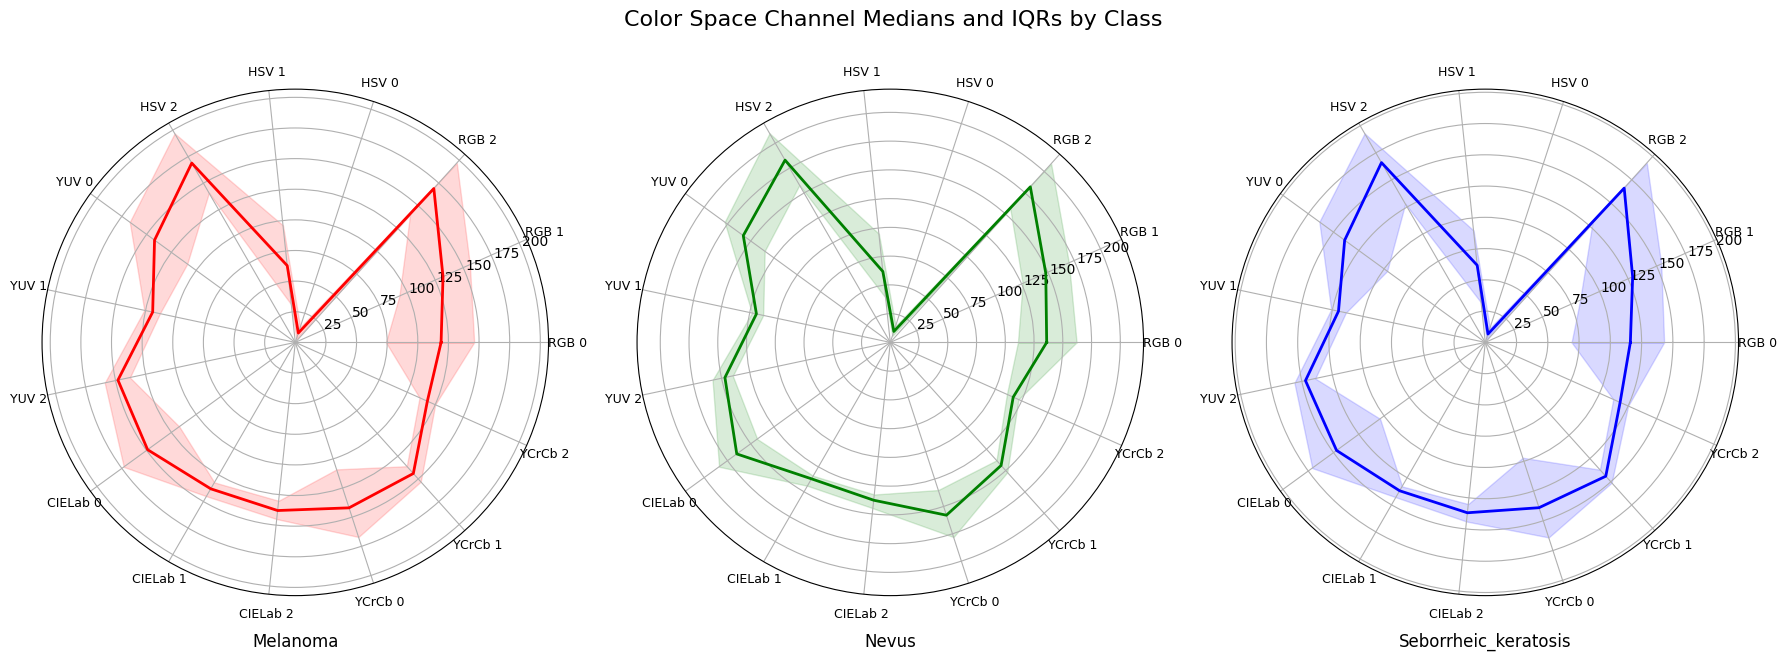

In [1]:
import matplotlib.pyplot as plt
import numpy as np

data = {
    'RGB': {
        'melanoma': {'median': [119, 132, 169], 'q1': [74, 93, 140], 'q3': [146, 156, 197]},
        'nevus': {'median': [136, 148, 182], 'q1': [111, 126, 156], 'q3': [162, 170, 209]},
        'seborrheic_keratosis': {'median': [116, 129, 166], 'q1': [69, 83, 128], 'q3': [143, 154, 193]},
    },
    'HSV': {
        'melanoma': {'median': [8, 63, 169], 'q1': [3, 31, 141], 'q3': [13, 96, 197]},
        'nevus': {'median': [10, 62, 183], 'q1': [6, 39, 158], 'q3': [15, 95, 210]},
        'seborrheic_keratosis': {'median': [7, 62, 166], 'q1': [3, 32, 128], 'q3': [12, 90, 193]},
    },
    'YUV': {
        'melanoma': {'median': [142, 119, 148], 'q1': [109, 113, 138], 'q3': [167, 126, 159]},
        'nevus': {'median': [158, 119, 147], 'q1': [135, 113, 140], 'q3': [178, 123, 158]},
        'seborrheic_keratosis': {'median': [139, 120, 147], 'q1': [97, 114, 139], 'q3': [164, 126, 156]},
    },
    'CIELab': {
        'melanoma': {'median': [149, 138, 138], 'q1': [117, 132, 130], 'q3': [173, 145, 145]},
        'nevus': {'median': [165, 137, 138], 'q1': [143, 134, 133], 'q3': [184, 144, 145]},
        'seborrheic_keratosis': {'median': [147, 137, 137], 'q1': [104, 133, 130], 'q3': [171, 143, 144]},
    },
    'YCrCb': {
        'melanoma': {'median': [142, 144, 118], 'q1': [109, 136, 111], 'q3': [167, 153, 125]},
        'nevus': {'median': [158, 144, 117], 'q1': [135, 138, 111], 'q3': [178, 152, 122]},
        'seborrheic_keratosis': {'median': [139, 144, 118], 'q1': [97, 137, 112], 'q3': [164, 151, 125]},
    },
}

classes = ['melanoma', 'nevus', 'seborrheic_keratosis']
colors = {'melanoma': 'r', 'nevus': 'g', 'seborrheic_keratosis': 'b'}

color_spaces = list(data.keys())
num_axes = len(color_spaces) * 3
angles = np.linspace(0, 2 * np.pi, num_axes, endpoint=False).tolist()
angles += angles[:1]  # Close loop

labels = []
for cs in color_spaces:
    for ch in range(3):
        labels.append(f'{cs} {ch}')

fig, axs = plt.subplots(1, len(classes), subplot_kw=dict(polar=True), figsize=(18, 6))

if len(classes) == 1:
    axs = [axs]  # Ensure axs is iterable even if only 1 class

for ax, cls in zip(axs, classes):
    medians, q1s, q3s = [], [], []
    for cs in color_spaces:
        medians += data[cs][cls]['median']
        q1s += data[cs][cls]['q1']
        q3s += data[cs][cls]['q3']

    # Close loop for radar
    medians += medians[:1]
    q1s += q1s[:1]
    q3s += q3s[:1]

    # Plot median and IQR fill
    ax.plot(angles, medians, color=colors[cls], linewidth=2)
    ax.fill_between(angles, q1s, q3s, color=colors[cls], alpha=0.15)

    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels, fontsize=9)
    ax.set_title(cls.capitalize(), y=0, pad=-26, verticalalignment="top")

plt.suptitle("Color Space Channel Medians and IQRs by Class", size=16, y=1.05)
plt.tight_layout()
plt.show()